In [26]:
import random
import numpy as np

# data
%pip install dash
%pip install pandas
%pip install scikit-learn
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

# dash
from dash import Dash, dcc, html, Input, Output, State
from dash.exceptions import PreventUpdate
import dash_bootstrap_components as dbc

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# ANN
## Creating ANN

ANN comprises of the following components:
- An input layer that receives data and pass it on
- A hidden layer
- An output layer
- Weights between the layers
- A deliberate activation function for every hidden layer. In this simple neural network, we’ll employ the Sigmoid activation function

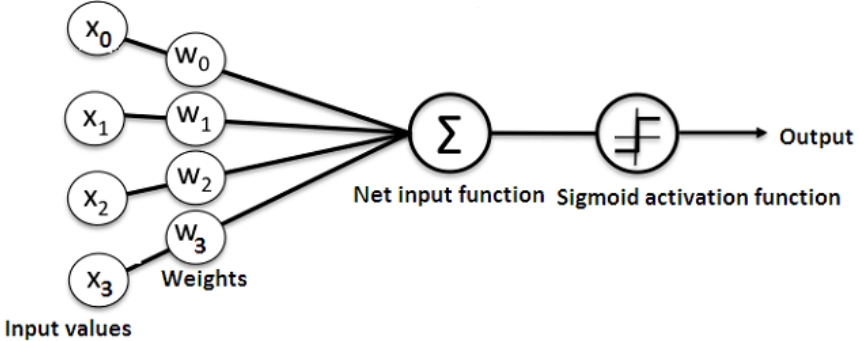 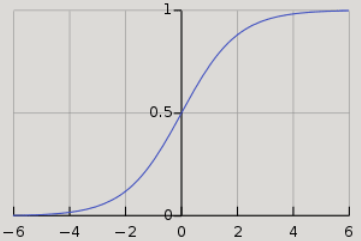

## Training the Model

Here is the procedure for the training process we used in this neural network example problem:
- We took the inputs from the training dataset, performed some adjustments based on their weights, and siphoned them via a method that computed the output of the ANN.
- We computed the back-propagated error rate. In this case, it is the difference between neuron’s predicted output and the expected output of the training dataset.
- Based on the extent of the error got, we performed some minor weight adjustments using the Error Weighted Derivative formula.
- We iterated this process an arbitrary number of 15,000 times. In every iteration, the whole training set is processed simultaneously.

In [27]:
class ArtificialNeuralNetwork():
    def __init__(self):
        # seeding for random number generation
        np.random.seed(random.randint(0, 1000))
        
        # converting weights to a N by 1 matrix with values from -1 to 1 and mean of 0
        self.weights = None

    def activationFunction(self, x):
        # sigmoid
        return 1 / (1 + np.exp(-x))

    def activationFunctionDerivative(self, x):
        # sigmoid derivative
        return x * (1 - x)

    def train(self, trainingInputs, trainingOutputs, trainingIterations):
        self.weights = 2 * np.random.random((trainingInputs.shape[1], 1)) - 1
        print("Beginning Random Weights:\n", self.weights[0:10])

        # training the model to make accurate predictions while adjusting weights continually
        for iteration in range(trainingIterations):
            output = self.predict(trainingInputs)
            error = trainingOutputs - output
            
            # performing weight adjustments
            adjustments = np.dot(
                trainingInputs.T,
                error * self.activationFunctionDerivative(output)
            )
            self.weights += adjustments
        
        print("Ending Trained Weights:\n", self.weights[0:10])

    def predict(self, inputs):
        # passing the inputs via the neuron to get output
        return self.activationFunction(np.dot(
            inputs.astype(float),
            self.weights
        ))

In [28]:
ann = ArtificialNeuralNetwork()

# Training data consisting of 4 examples--3 input values and 1 output
trainingInputs = np.array([
    [0,0,1],
    [1,1,1],
    [1,0,1],
    [0,1,1]
])
trainingOutputs = np.array([[0,1,1,0]]).T

# Training
ann.train(trainingInputs, trainingOutputs, 5000)

Beginning Random Weights:
 [[ 0.61760311]
 [ 0.67780882]
 [-0.64329386]]
Ending Trained Weights:
 [[ 8.96009802]
 [-0.20961214]
 [-4.27166813]]


In [29]:
# userInput = input(f"User Input:").split()

# print("Considering New Situation: ", userInput)
# print("New Output data:\n", ann.predict(np.array(userInput)))

## UI

Lets create a simple UI for this application

In [30]:
# CSS
ButtonStyle = {
    'width': '10%',
    'color': 'white',
    'border': 'none',
    'border-radius': '4px'
}

ButtonPadding = {
    'padding-top': '5px',
    'padding-right': '5px',
    'padding-bottom': '5px',
    'padding-left': '5px'
}

TextStyle = {
    'padding-top': '5px',
    'padding-right': '5px',
    'padding-bottom': '0px',
    'padding-left': '5px'
}

In [31]:
app = Dash(external_stylesheets=[dbc.themes.CYBORG], suppress_callback_exceptions=True)
app.title = "Connection Flight Predictor using ANN"

app.layout = html.Div(
    style={"background-color": "#282c34", "padding": "50px"},
    children=[
        html.H2("Connection Flight Predictor using ANN", style={"color": "#61dafb"}),  # Title
        dbc.Card(
            style={"background-color": "#282c34", "border-color": "#61dafb"},
            children=[
                dbc.CardBody(
                    style={"padding": "20px"},
                    children=[
                        dbc.Row(
                            children=[
                                dbc.Col(
                                    html.Div(
                                        "Sample 1",
                                        style={
                                            "color": "#61dafb",
                                            "font-weight": "bold",
                                            "margin-bottom": "10px",
                                        },
                                    )
                                ),
                                dbc.Col(
                                    html.Div(
                                        "Sample 2",
                                        style={
                                            "color": "#61dafb",
                                            "font-weight": "bold",
                                            "margin-bottom": "10px",
                                        },
                                    )
                                ),
                                dbc.Col(
                                    html.Div(
                                        "Sample 3",
                                        style={
                                            "color": "#61dafb",
                                            "font-weight": "bold",
                                            "margin-bottom": "10px",
                                        },
                                    )
                                ),
                            ]
                        ),
                        dbc.Row(
                            children=[
                                dbc.Col(
                                    dcc.Slider(
                                        min=0,
                                        max=1,
                                        value=0,
                                        id="input1",
                                        className="slider",
                                    )
                                ),
                                dbc.Col(
                                    dcc.Slider(
                                        min=0,
                                        max=1,
                                        value=0,
                                        id="input2",
                                        className="slider",
                                    )
                                ),
                                dbc.Col(
                                    dcc.Slider(
                                        min=0,
                                        max=1,
                                        value=0,
                                        id="input3",
                                        className="slider",
                                    )
                                ),
                            ]
                        ),
                    ],
                )
            ],
        ),
        html.Div(
            html.Button(
                "EXECUTE",
                id="executeButton",
                style={
                    "background-color": "#61dafb",
                    "color": "#282c34",
                    "padding": "10px 20px",
                    "border": "none",
                    "border-radius": "5px",
                    "font-size": "16px",
                    "cursor": "pointer",
                    "margin-top": "20px",
                },
                n_clicks=0,
            ),
            style={"text-align": "center"},
        ),
        dbc.Card(
            style={"background-color": "#282c34", "border-color": "#61dafb"},
            children=[
                dbc.CardBody(
                    style={"padding": "20px"},
                    children=[
                        html.Div(
                            "Prediction:",
                            style={
                                "color": "#61dafb",
                                "font-weight": "bold",
                                "margin-bottom": "10px",
                            },
                        ),
                        html.Div(id="output", style={"color": "#61dafb"}),
                    ],
                )
            ],
        ),
    ],
)

In [32]:
@app.callback(
    Output('output', 'children'),
    [
        Input('executeButton', 'n_clicks'),
        State('input1', 'value'),
        State('input2', 'value'),
        State('input3', 'value'),
    ],
    prevent_initial_call=True
)
def executeRF(n_clicks, input1, input2, input3):
    print([input1, input2, input3])
    out = ann.predict(np.array([input1, input2, input3]))
    print(out)
    return out

In [33]:
app.run()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [24/May/2023 20:29:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2023 20:29:28] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2023 20:29:28] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2023 20:29:28] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 304 -
127.0.0.1 - - [24/May/2023 20:29:32] "POST /_dash-update-component HTTP/1.1" 200 -


[0.36, 0.58, 0.46]
[0.75751306]


127.0.0.1 - - [24/May/2023 20:29:37] "POST /_dash-update-component HTTP/1.1" 200 -


[1, 0.58, 0.46]
[0.99896628]


## Dataset

In [ ]:
df = pd.read_csv("holidays_events.csv")

print(df.shape)
df.head()

(350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
df.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [ ]:
df.drop(['date', 'description'], inplace=True, axis=1)

df.head()

,type,locale,locale_name,transferred
0,Holiday,Local,Manta,False
1,Holiday,Regional,Cotopaxi,False
2,Holiday,Local,Cuenca,False
3,Holiday,Local,Libertad,False
4,Holiday,Local,Riobamba,False


In [ ]:
data = pd.get_dummies(df) # one hot encoding

data.head()

,transferred,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,locale_Regional,...,locale_name_Machala,locale_name_Manta,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas
0,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
train, test = train_test_split(data, test_size=0.2)

print(train.shape, test.shape)

(280, 34) (70, 34)


In [ ]:
trainingInputs = train.drop('transferred', axis=1)
trainingOutputs = train['transferred']

testingInputs = test.drop('transferred', axis=1)
testingOutputs = test['transferred']

print(trainingInputs.shape, trainingOutputs.shape)
print(testingInputs.shape, testingOutputs.shape)

(280, 33) (280,)
(70, 33) (70,)


In [ ]:
trainingInputs = np.array(trainingInputs.to_numpy())
testingInputs = np.array(testingInputs.to_numpy())
print(trainingInputs[0:5])

[[False False  True False False False False  True False False False False
  False  True False False False False False False False False False False
  False False False False False False False False False]
 [False False False  True False False  True False False False False False
  False False False False False False False False  True False False False
  False False False False False False False False False]
 [False False False  True False False False  True False False False False
  False  True False False False False False False False False False False
  False False False False False False False False False]
 [False False False  True False False  True False False False  True False
  False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False  True False False  True False False False  True False
  False False False False False False False False False False False False
  False False False False False 

In [ ]:
trainingOutputs = np.array([trainingOutputs.to_numpy()]).T
testingOutputs = np.array([testingOutputs.to_numpy()]).T
print(trainingOutputs[0:5])

[[False]
 [False]
 [False]
 [False]
 [False]]


In [ ]:
ann = ArtificialNeuralNetwork()

ann.train(trainingInputs, trainingOutputs, 5000)

Beginning Random Weights:
 [[-0.39043671]
 [ 0.90606594]
 [ 0.92941739]
 [-0.31247573]
 [ 0.98777153]
 [-0.39585194]
 [ 0.75246219]
 [ 0.41128533]
 [ 0.36230024]
 [ 0.09653191]]
Ending Trained Weights:
 [[ -5.24565834]
 [  0.27248201]
 [ -4.46656335]
 [-21.80977052]
 [ -0.18147298]
 [ -1.05298153]
 [-15.07806974]
 [-16.09684329]
 [ -1.5074944 ]
 [ -1.51960517]]


In [ ]:
predictedOutputs = ann.predict(testingInputs)

predictedOutputs[predictedOutputs < 0.5] = False
predictedOutputs[predictedOutputs >= 0.5] = True
print(predictedOutputs[0:5])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
con_mat = sklearn.metrics.confusion_matrix(testingOutputs, predictedOutputs)
print(con_mat)

[[67  0]
 [ 3  0]]


In [ ]:
tn = con_mat[0][0]
fn = con_mat[1][0]
fp = con_mat[0][1]
tp = con_mat[1][1]

print(tn, fn, fp, tp)

67 3 0 0


In [ ]:
# if tp+fn == 0:
#     print("Recall: 0.0")
# else:
#     print("Recall:", tp/(tp + fn))
# print('TruePositive/(TruePositive + FalseNegative) : Correct Positive Predictions against All Positive Cases'),
# print('Measures Model\'s Ability to Detect Positves\n')

# if tp+fp == 0:
#     print("Precision: 0.0")
# else:
#     print('Precision:', tp/(tp+fp))
# print('TruePositive/(TruePositive + FalsePositive) : Correct Positive Predictions against All Positive Predictions')
# print('Measures Model\'s Ability to Correctly Classify Case as Positive\n')

print('Accuracy:', (tp+tn)/(tp+tn+fp+fn))
print('(TruePositive + TrueNegative)/Total : Correct Predictions against All Cases')
print('Measures Model\'s Ability to Correctly Classify Case as Positive or Negative\n')

Accuracy: 0.9571428571428572
(TruePositive + TrueNegative)/Total : Correct Predictions against All Cases
Measures Model's Ability to Correctly Classify Case as Positive or Negative

